## Descargue las bases de datos

In [1]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)


Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [4]:
# prompt: 'common_player_info.csv'
# 'draft_combine_stats.csv'
# 'game.csv'
# y llamelas  players_df, combine_stats_df y games_df

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Download the datasets (if not already downloaded)
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv

# Load the datasets into pandas DataFrames
players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [ ]:
# Lista de las temporadas más recientes (ajusta esto con los resultados del paso anterior)
#recent_seasons = [
#       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
#       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
#       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
#       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
#       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
#       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
#       32003]


# Filtrar el DataFrame por las últimas temporadas
#games_filtered_seasons  = games_df[games_df['season_id'].isin(recent_seasons)]


In [19]:
games_df['season_id'] = games_df['season_id'].astype(str)
games_filtered_seasons = games_df[games_df['season_id'].str.contains(r'19[8-9]\d|200[0-3]', regex=True)]


In [21]:
seasons_to_keep = [str(year) for year in range(1984, 2004)]
season_mask = games_df['season_id'].str.contains('|'.join(seasons_to_keep))
games_filtered_seasons = games_df[season_mask]

Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [ ]:
# Filtrar solo partidos de Playoffs

# Verificar cuántos partidos de Playoffs quedaron


In [20]:
games_playoffs_cleaned = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']
print(f"Number of playoff games: {len(games_playoffs_cleaned)}")

Number of playoff games: 1383


In [22]:
games_playoffs_cleaned = games_filtered_seasons[games_filtered_seasons['season_type'] == 'Playoffs']
print(f"Number of playoff games: {len(games_playoffs_cleaned)}")

Number of playoff games: 1161


Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [35]:
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='inner')

In [39]:
player_game_stats = pd.merge(players_combined, games_playoffs_cleaned, left_on='team_id', right_on='team_id_home', how='inner')

In [30]:
players_df.columns

Index(['person_id', 'first_name', 'last_name', 'display_first_last',
       'display_last_comma_first', 'display_fi_last', 'player_slug',
       'birthdate', 'school', 'country', 'last_affiliation', 'height',
       'weight', 'season_exp', 'jersey', 'position', 'rosterstatus',
       'games_played_current_season_flag', 'team_id', 'team_name',
       'team_abbreviation', 'team_code', 'team_city', 'playercode',
       'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag',
       'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag'],
      dtype='object')

##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [41]:
num_teams = games_playoffs_cleaned['team_name_home'].nunique()
print(f"Número de equipos participantes en los playoffs (1984-2003): {num_teams}")

Número de equipos participantes en los playoffs (1984-2003): 30


2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [42]:
num_players = player_game_stats['person_id'].nunique()
print(f"Número de jugadores diferentes que han participado en los playoffs: {num_players}")

Número de jugadores diferentes que han participado en los playoffs: 518


* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

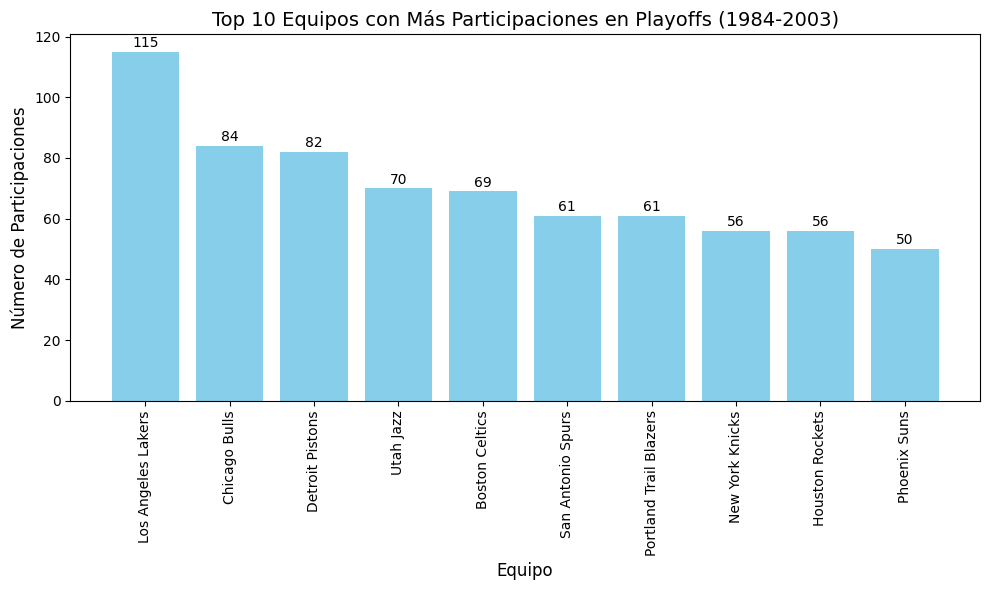

In [47]:
team_counts = games_playoffs_cleaned['team_name_home'].value_counts().head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(team_counts.index, team_counts.values, color='skyblue')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Número de Participaciones", fontsize=12)
plt.title("Top 10 Equipos con Más Participaciones en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [50]:
team_player_counts = player_game_stats.groupby('team_name_home')['person_id'].nunique()
team_player_counts

,person_id
team_name_home,
Atlanta Hawks,17
Boston Celtics,16
Charlotte Hornets,24
Chicago Bulls,16
Cleveland Cavaliers,17
Dallas Mavericks,14
Denver Nuggets,21
Detroit Pistons,17
Golden State Warriors,21


3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [ ]:
# Agrupar por equipo y sumar los puntos anotados como locales

# Mostrar los equipos que más puntos han anotado



* haga un grafico de barras en azul con estos resultados

Equipos con más puntos anotados como locales en los Playoffs:
team_name_home
Los Angeles Lakers       12554.00
Chicago Bulls             8392.00
Detroit Pistons           8127.00
Boston Celtics            7702.00
Utah Jazz                 7025.00
Portland Trail Blazers    6496.00
San Antonio Spurs         5965.00
Houston Rockets           5806.00
Phoenix Suns              5435.00
New York Knicks           5364.00
Name: pts_home, dtype: float64


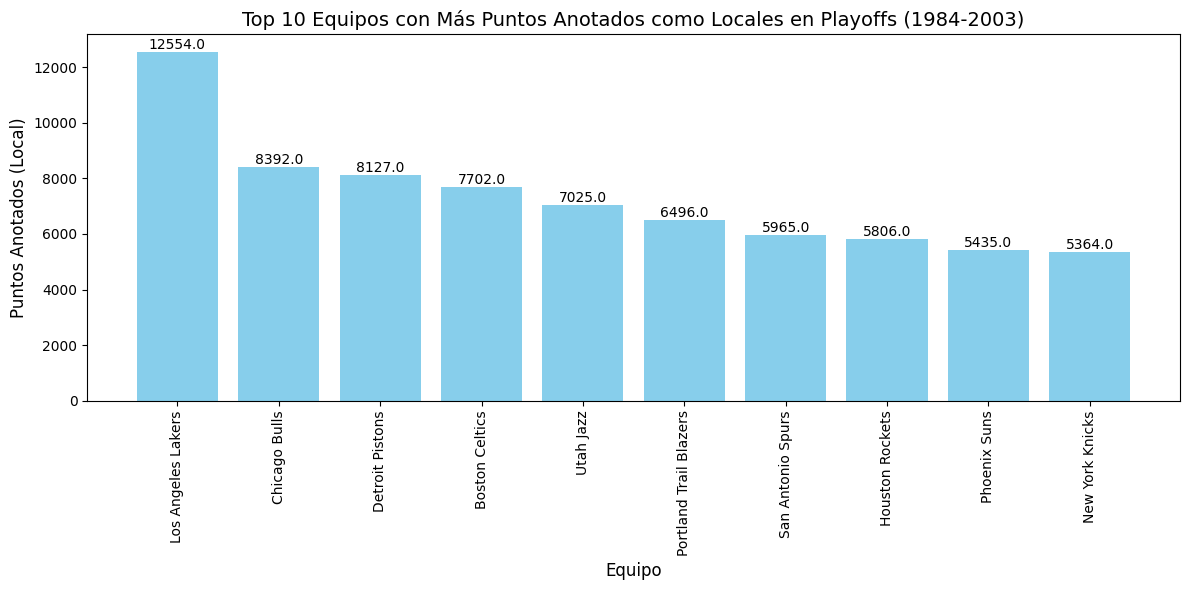

In [54]:
team_points = games_playoffs_cleaned.groupby('team_name_home')['pts_home'].sum()
team_points_sorted = team_points.sort_values(ascending=False)
print("Equipos con más puntos anotados como locales en los Playoffs:")
print(team_points_sorted.head(10))
plt.figure(figsize=(12, 6))
bars = plt.bar(team_points_sorted.index[:10], team_points_sorted.values[:10], color='skyblue')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Puntos Anotados (Local)", fontsize=12)
plt.title("Top 10 Equipos con Más Puntos Anotados como Locales en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.tight_layout()
plt.show()

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

Equipos con mejor promedio de puntos por partido (en casa):
team_name_home
Denver Nuggets           115.20
Boston Celtics           111.62
Golden State Warriors    110.00
Los Angeles Lakers       109.17
Phoenix Suns             108.70
Dallas Mavericks         108.20
Portland Trail Blazers   106.49
Milwaukee Bucks          105.72
Seattle SuperSonics      104.81
Houston Rockets          103.68
Name: pts_home, dtype: float64


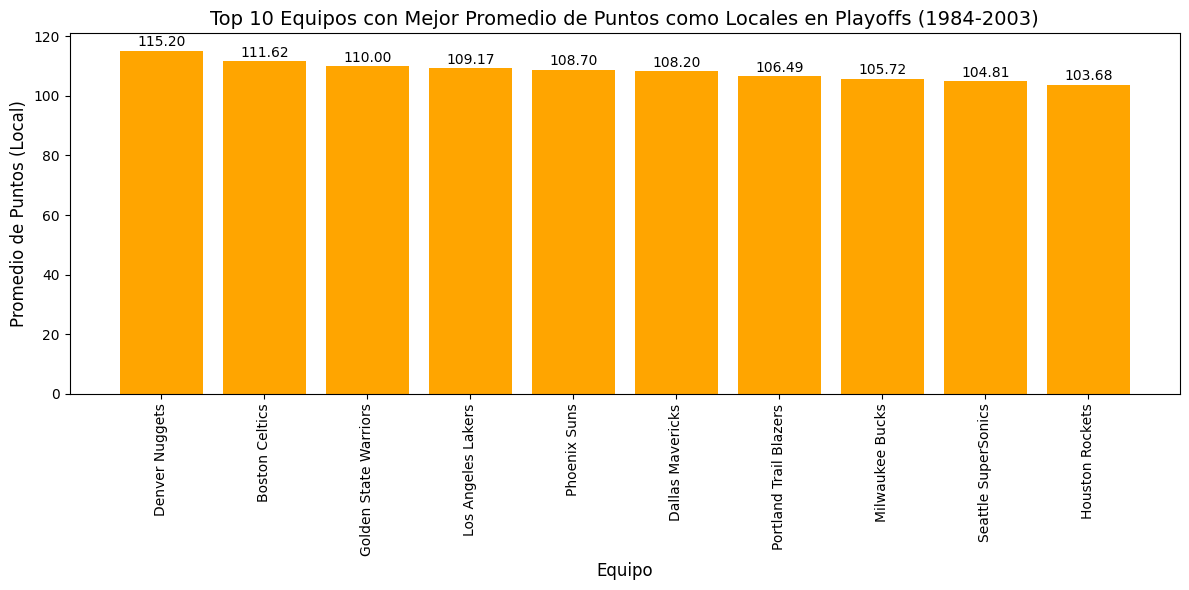

In [58]:
team_avg_points = games_playoffs_cleaned.groupby('team_name_home')['pts_home'].mean()
team_avg_points_sorted = team_avg_points.sort_values(ascending=False)
print("Equipos con mejor promedio de puntos por partido (en casa):")
print(team_avg_points_sorted.head(10))
plt.figure(figsize=(12, 6))
bars = plt.bar(team_avg_points_sorted.index[:10], team_avg_points_sorted.values[:10], color='orange')
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("Promedio de Puntos (Local)", fontsize=12)
plt.title("Top 10 Equipos con Mejor Promedio de Puntos como Locales en Playoffs (1984-2003)", fontsize=14)
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')  # Mostrar valor con 2 decimales
plt.tight_layout()
plt.show()

In [ ]:
# Calcular el promedio de puntos por equipo en casa

# Mostrar los equipos con mejor promedio de puntos en casa


Hga un grafico en naranja de estos resultados

In [ ]:
# Gráfica del promedio de puntos en casa por equipo


5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [ ]:
# Agrupar por temporada y sumar los puntos anotados

# Mostrar las temporadas con más puntos


In [60]:

season_total_points = games_playoffs_cleaned.groupby('season_id')[['pts_home', 'pts_away']].sum()
season_total_points['total_points'] = season_total_points['pts_home'] + season_total_points['pts_away']
season_total_points_sorted = season_total_points.sort_values('total_points', ascending=False)

# Mostrar las temporadas con más puntos sin gráfico
print("Temporadas con más puntos anotados en los Playoffs:")
print(season_total_points_sorted[['total_points']])

Temporadas con más puntos anotados en los Playoffs:
           total_points
season_id              
42002          16900.00
41987          16691.00
41986          15678.00
41984          15598.00
41989          15195.00
41992          15127.00
41991          15075.00
41985          15057.00
41994          14492.00
42003          14437.00
41990          14165.00
41996          13539.00
42000          13293.00
41988          13003.00
41997          12955.00
41998          11566.00


* Cree una serie de tiempo con esto:

In [ ]:
# Gráfica de las temporadas con más puntos


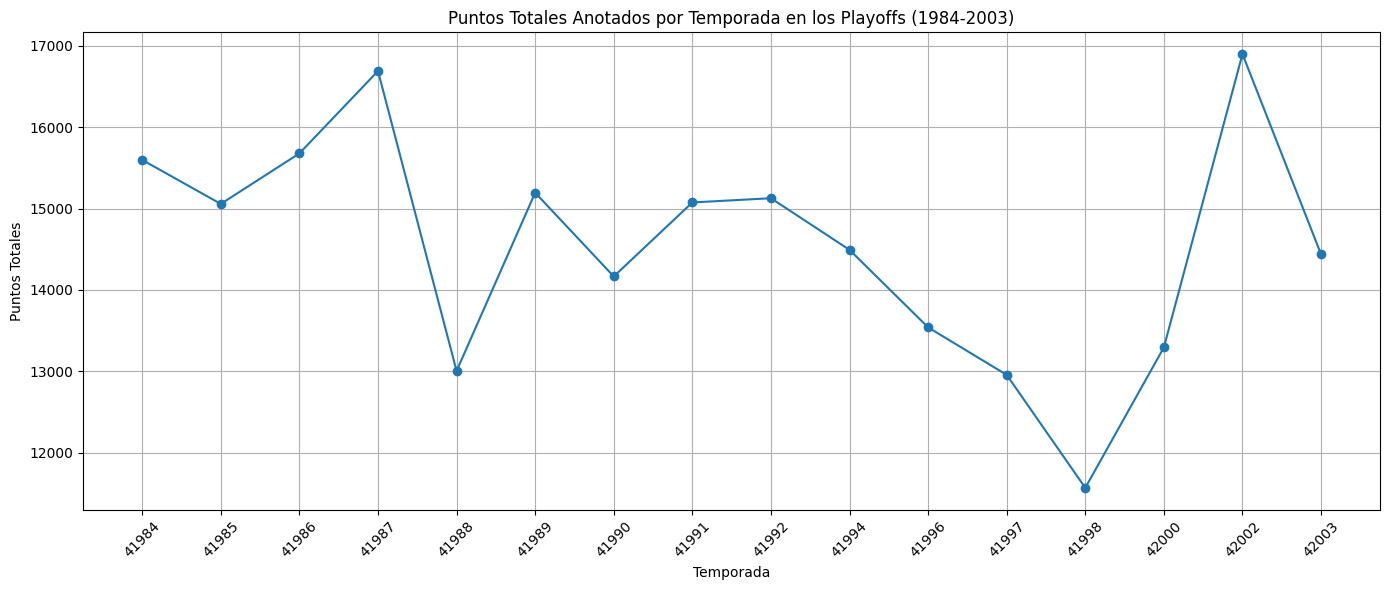

In [61]:

season_total_points_sorted = season_total_points.sort_index()
plt.figure(figsize=(14, 6))
plt.plot(season_total_points_sorted.index, season_total_points_sorted['total_points'], marker='o', linestyle='-')
plt.xlabel("Temporada")
plt.ylabel("Puntos Totales")
plt.title("Puntos Totales Anotados por Temporada en los Playoffs (1984-2003)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* Hay algun dato interesante en esta graficaa

DATO INTERESANTE: Se evidencia que en el 98 cayeron los puntos, de la manera mas significativa en toda la tempora, pero asi mismo esto fue motivo de que el equipo lofrara conseguir la mayor cantidad de puntos de la historia, lo que muestra que muchas veces estar abajo en puntos no siempre es negativo, es impulso para superarse

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


In [ ]:
# Crear pivot table para comparar el rendimiento promedio por posición y equipo

# Mostrar el resultado de la pivot table


In [63]:
pivot_table = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index='team_name_home', columns='position_y', aggfunc='mean')
pivot_table

ast_home                                            \
position_y                    C  C-PF    PF  PF-C PF-SF    PG PG-SG    SF   
team_name_home                                                              
Atlanta Hawks             22.88   NaN 22.88   NaN 22.88 22.88   NaN 22.88   
Boston Celtics            26.81   NaN 26.81   NaN 26.81 26.81 26.81 26.81   
Charlotte Hornets         22.87 22.87 22.87   NaN 22.87 22.87 22.87 22.87   
Chicago Bulls             24.55   NaN 24.55 24.55   NaN 24.55 24.55 24.55   
Cleveland Cavaliers       26.63 26.63 26.63   NaN   NaN 26.63   NaN 26.63   
Dallas Mavericks            NaN   NaN 23.29   NaN   NaN 23.29   NaN   NaN   
Denver Nuggets            24.88   NaN 24.88 24.88   NaN 24.88   NaN 24.88   
Detroit Pistons           21.06   NaN 21.06   NaN 21.06 21.06 21.06 21.06   
Golden State Warriors       NaN 21.38 21.38 21.38 21.38 21.38 21.38 21.38   
Houston Rockets           25.04 25.04 25.04   NaN   NaN 25.04   NaN 25.04   
Indiana Pacers              NaN 20.52 20.52 20.52   NaN 20.52 20.52 20.52   
Los Angeles Clippers      23.60 23.60 23.60   NaN   NaN   NaN   NaN 23.60   
Los Angeles Lakers          NaN   NaN 27.24 27.24   NaN 27.24 27.24 27.24   
Memphis Grizzlies         17.50 17.50 17.50 17.50   NaN 17.50   NaN 17.50   
Miami Heat                17.32 17.32 17.32 17.32   NaN 17.32   NaN 17.32   
Milwaukee Bucks           24.67 24.67 24.67   NaN   NaN 24.67 24.67 24.67   
Minnesota Timberwolves    21.40 21.40 21.40 21.40   NaN 21.40   NaN 21.40   
New Jersey Nets           23.09   NaN 23.09 23.09   NaN 23.09   NaN 23.09   
New Orleans Hornets         NaN   NaN 22.83   NaN   NaN 22.83   NaN 22.83   
New York Knicks           22.62   NaN 22.62   NaN   NaN 22.62   NaN 22.62   
Orlando Magic             21.45 21.45 21.45   NaN   NaN 21.45 21.45 21.45   
Philadelphia 76ers        22.52 22.52 22.52   NaN 22.52 22.52 22.52 22.52   
Phoenix Suns                NaN   NaN 25.00 25.00   NaN 25.00   NaN 25.00   
Portland Trail Blazers    24.07   NaN 24.07 24.07   NaN 24.07 24.07 24.07   
Sacramento Kings          22.74   NaN 22.74 22.74   NaN 22.74   NaN   NaN   
San Antonio Spurs         22.69   NaN 22.69 22.69   NaN 22.69   NaN 22.69   
Seattle SuperSonics       22.81   NaN 22.81   NaN 22.81 22.81   NaN 22.81   
Toronto Raptors           21.80   NaN 21.80 21.80   NaN   NaN   NaN 21.80   
Utah Jazz                 23.04 23.04 23.04 23.04 23.04 23.04   NaN 23.04   
Washington Bullets        18.00 18.00 18.00 18.00   NaN 18.00 18.00 18.00   

                                                     pts_home                \
position_y             SF-PF SF-SG    SG SG-PG SG-SF        C   C-PF     PF   
team_name_home                                                                
Atlanta Hawks            NaN   NaN 22.88   NaN 22.88    99.38    NaN  99.38   
Boston Celtics           NaN   NaN 26.81   NaN   NaN   111.62    NaN 111.62   
Charlotte Hornets      22.87 22.87 22.87   NaN 22.87    97.47  97.47  97.47   
Chicago Bulls            NaN   NaN 24.55   NaN 24.55    99.90    NaN  99.90   
Cleveland Cavaliers    26.63 26.63 26.63   NaN 26.63   101.00 101.00 101.00   
Dallas Mavericks         NaN   NaN 23.29   NaN 23.29      NaN    NaN 108.20   
Denver Nuggets           NaN   NaN 24.88 24.88 24.88   115.20    NaN 115.20   
Detroit Pistons        21.06   NaN 21.06   NaN 21.06    99.11    NaN  99.11   
Golden State Warriors    NaN 21.38 21.38 21.38 21.38      NaN 110.00 110.00   
Houston Rockets        25.04 25.04 25.04   NaN   NaN   103.68 103.68 103.68   
Indiana Pacers         20.52   NaN 20.52   NaN 20.52      NaN  95.61  95.61   
Los Angeles Clippers   23.60   NaN 23.60 23.60 23.60    99.40  99.40  99.40   
Los Angeles Lakers       NaN 27.24 27.24 27.24   NaN      NaN    NaN 109.17   
Memphis Grizzlies      17.50 17.50 17.50 17.50 17.50    95.00  95.00  95.00   
Miami Heat               NaN 17.32 17.32   NaN   NaN    87.80  87.80  87.80   
Milwaukee Bucks        24.67   NaN 24.67   NaN   NaN   105.

* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



In [ ]:
# Crear una columna que agrupe las posiciones en roles más generales


# Crear pivot table agrupando por los roles

# Graficar por roles agrupados


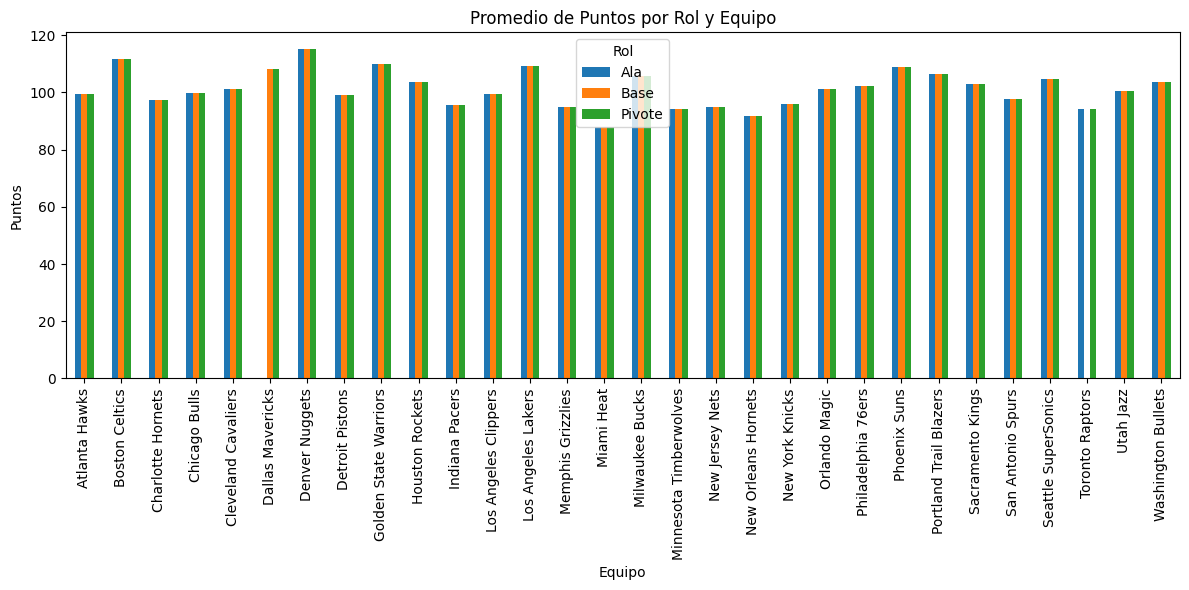

In [74]:

player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

pivot_table_roles = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index='team_name_home', columns='role', aggfunc='mean')

pivot_table_roles['pts_home'].plot(kind='bar', figsize=(12, 6))
plt.title('Promedio de Puntos por Rol y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [ ]:
# Crear una crosstab para analizar victorias por posición de los jugadores

# Mostrar el resultado de la crosstab


In [76]:
crosstab_result = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
crosstab_result

wl_home,L,W
position_y,,
C,546,1055
C-PF,170,271
PF,1192,2321
PF-C,341,699
PF-SF,136,270
PG,1160,2362
PG-SG,243,554
SF,860,1600
SF-PF,256,459


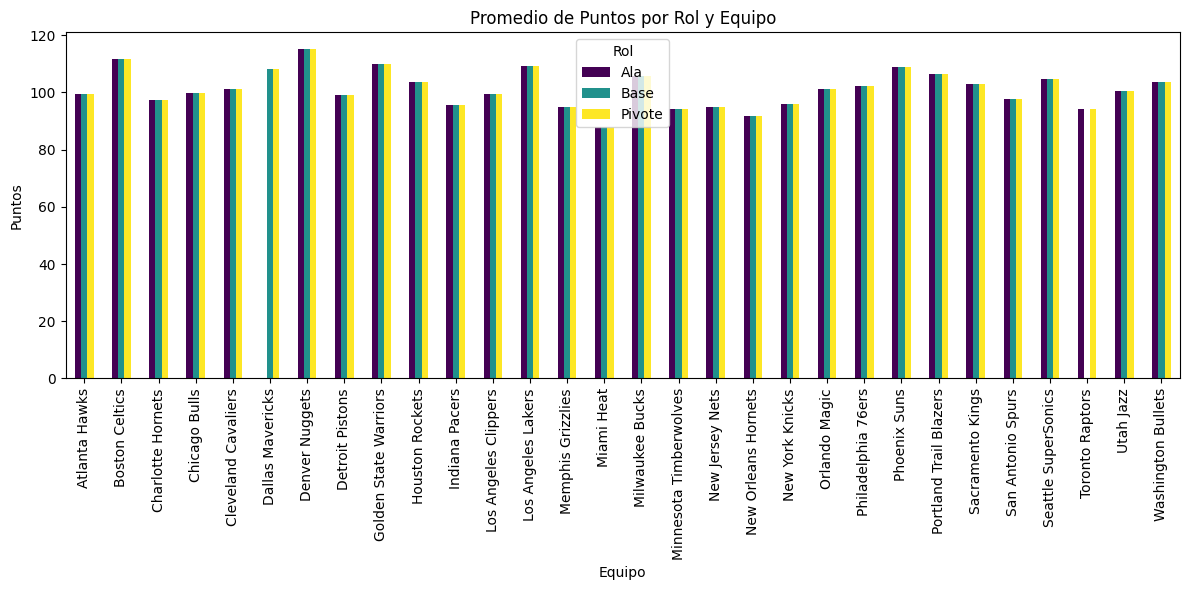

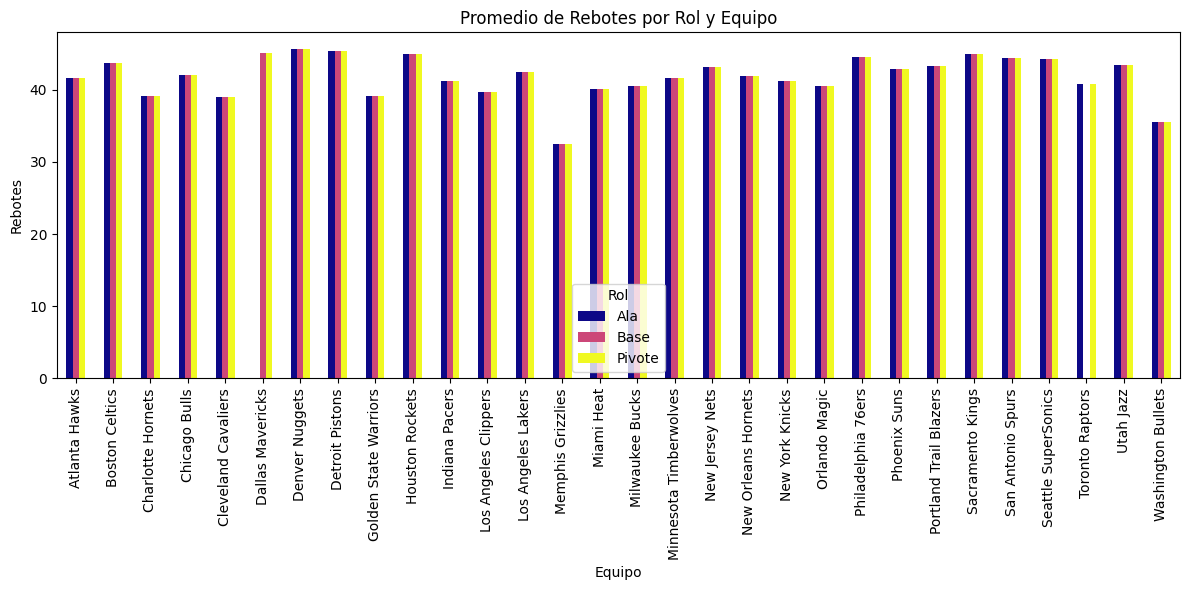

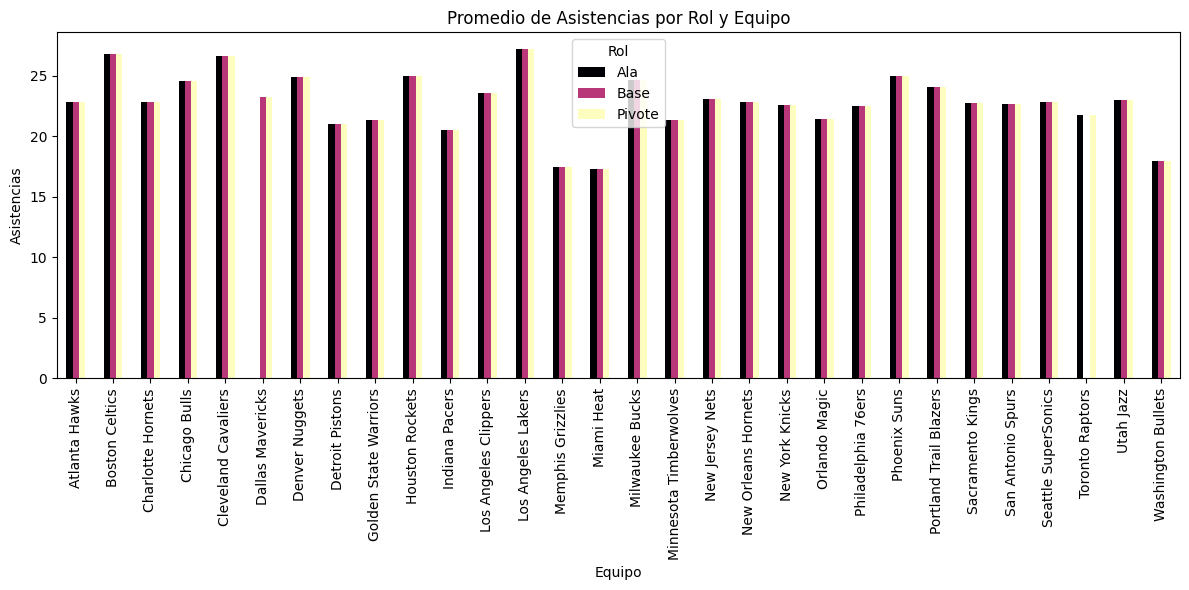

In [77]:
import matplotlib.pyplot as plt
pivot_table_roles['pts_home'].plot(kind='bar', figsize=(12, 6), colormap='viridis') # Use a colormap for better visualization
plt.title('Promedio de Puntos por Rol y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()
pivot_table_roles['reb_home'].plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Promedio de Rebotes por Rol y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Rebotes')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()
pivot_table_roles['ast_home'].plot(kind='bar', figsize=(12, 6), colormap='magma')
plt.title('Promedio de Asistencias por Rol y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Asistencias')
plt.xticks(rotation=90)
plt.legend(title='Rol')
plt.tight_layout()
plt.show()

In [ ]:
# Gráfica para visualizar la pivot table


Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

In [ ]:
# Agrupar por temporada y calcular el promedio de puntos en casa

# Graficar la evolución del promedio de puntos por temporada


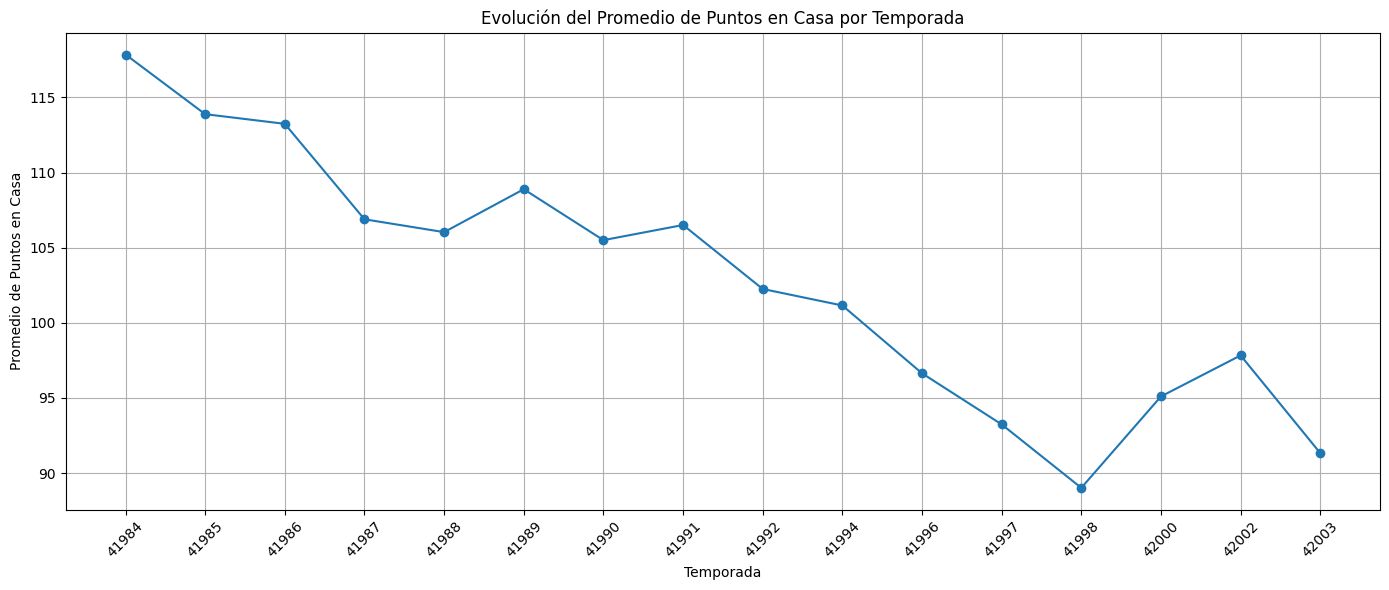

In [78]:
season_avg_points = games_playoffs_cleaned.groupby('season_id')['pts_home'].mean()
plt.figure(figsize=(14, 6))
plt.plot(season_avg_points.index, season_avg_points.values, marker='o', linestyle='-')
plt.xlabel("Temporada")
plt.ylabel("Promedio de Puntos en Casa")
plt.title("Evolución del Promedio de Puntos en Casa por Temporada")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

In [ ]:
# Identificar el equipo con más puntos anotados en total

# Filtrar los datos para ese equipo y agrupar por temporada

# Graficar la evolución del rendimiento del equipo


El equipo con más puntos anotados es: Los Angeles Lakers


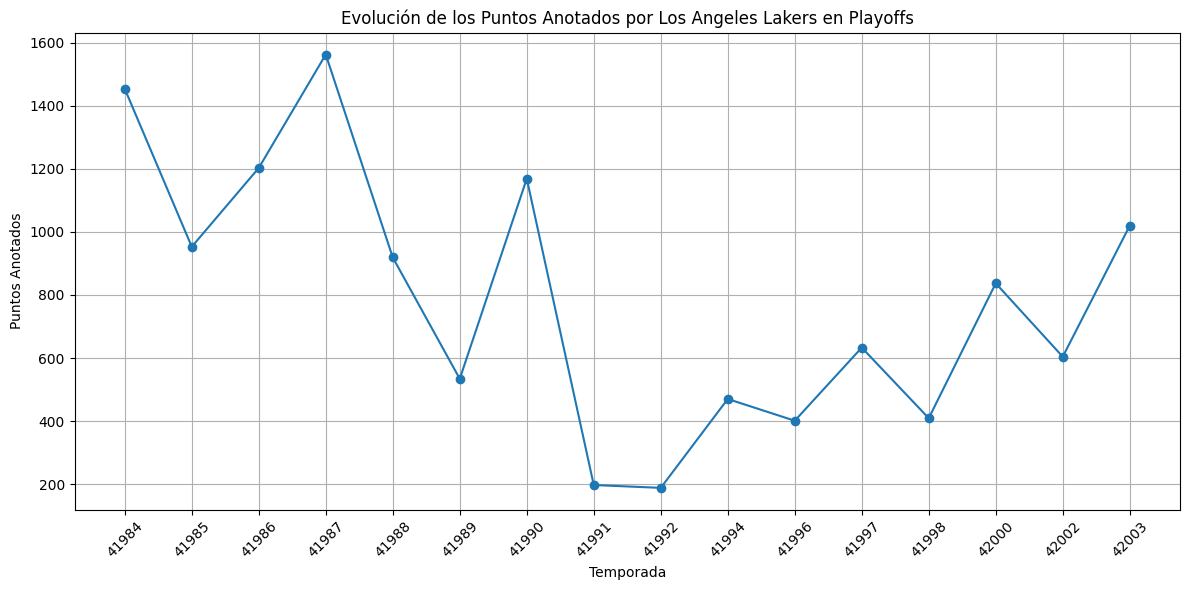

In [80]:

team_points = games_playoffs_cleaned.groupby('team_name_home')['pts_home'].sum()
best_team = team_points.idxmax()
print(f"El equipo con más puntos anotados es: {best_team}")

best_team_data = games_playoffs_cleaned[games_playoffs_cleaned['team_name_home'] == best_team]
best_team_performance = best_team_data.groupby('season_id')['pts_home'].sum()

plt.figure(figsize=(12, 6))
plt.plot(best_team_performance.index, best_team_performance.values, marker='o', linestyle='-')
plt.xlabel("Temporada")
plt.ylabel("Puntos Anotados")
plt.title(f"Evolución de los Puntos Anotados por {best_team} en Playoffs")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [ ]:
# Agrupar por jugador y sumar los puntos anotados

# Mostrar el jugador con más puntos anotados en los Playoffs


In [81]:
player_total_points = player_game_stats.groupby('person_id')['pts_home'].sum()
top_scorer_id = player_total_points.idxmax()
top_scorer_points = player_total_points.max()
top_scorer_name = players_df[players_df['person_id'] == top_scorer_id]['display_first_last'].iloc[0]
print(f"El jugador con más puntos anotados en los Playoffs es {top_scorer_name} con {top_scorer_points} puntos.")

El jugador con más puntos anotados en los Playoffs es Rawle Alkins con 16784.0 puntos.


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

In [ ]:
# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar la evolución del rendimiento del jugador



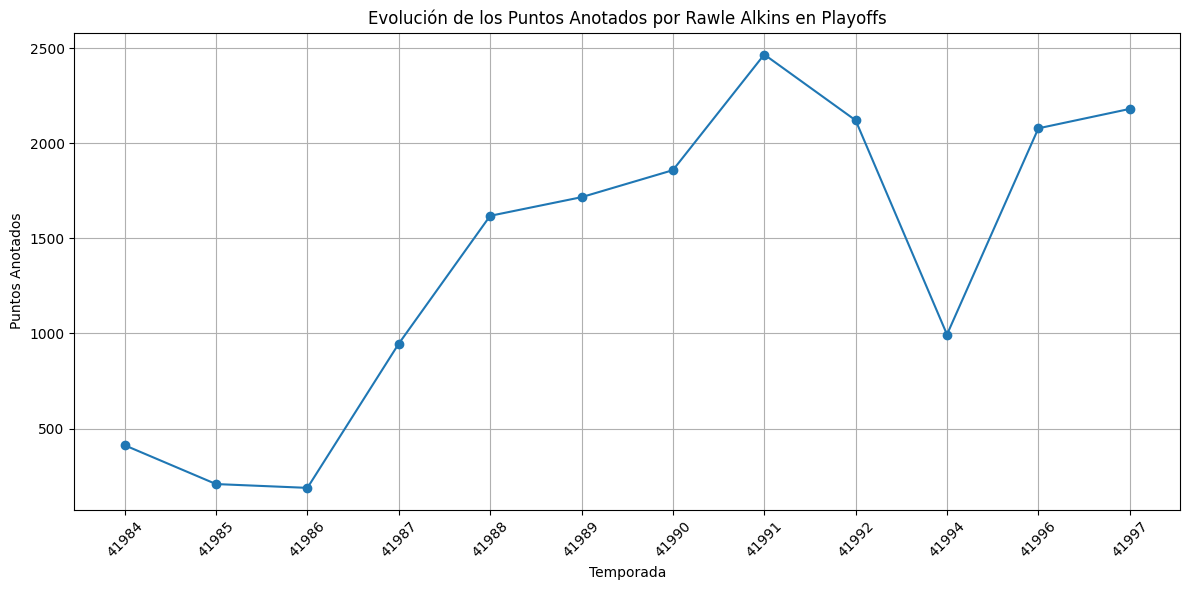

In [82]:
top_scorer_data = player_game_stats[player_game_stats['person_id'] == top_scorer_id]
top_scorer_performance = top_scorer_data.groupby('season_id')['pts_home'].sum()
plt.figure(figsize=(12, 6))
plt.plot(top_scorer_performance.index, top_scorer_performance.values, marker='o', linestyle='-')
plt.xlabel("Temporada")
plt.ylabel("Puntos Anotados")
plt.title(f"Evolución de los Puntos Anotados por {top_scorer_name} en Playoffs")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

In [ ]:
# Agrupar por jugador y calcular el promedio de puntos por partido

# Graficar los 10 jugadores con mejor promedio de puntos por partido


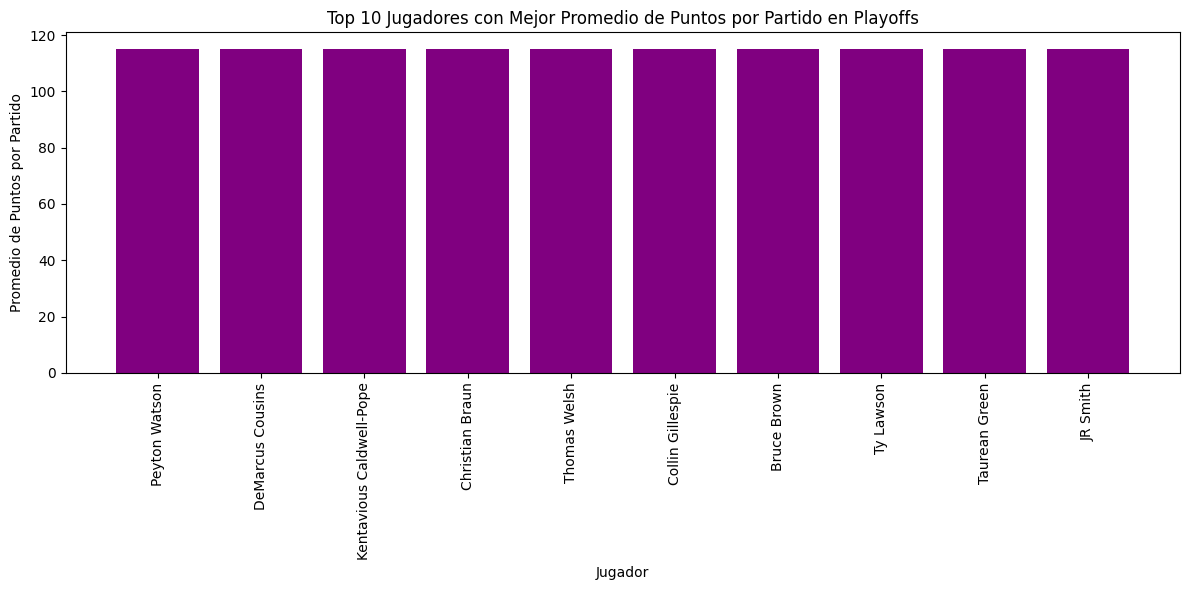

In [83]:
player_avg_points = player_game_stats.groupby('display_first_last')['pts_home'].mean()
player_avg_points_sorted = player_avg_points.sort_values(ascending=False)
top_10_players = player_avg_points_sorted.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_players.index, top_10_players.values, color='purple')
plt.xlabel("Jugador")
plt.ylabel("Promedio de Puntos por Partido")
plt.title("Top 10 Jugadores con Mejor Promedio de Puntos por Partido en Playoffs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

In [ ]:
# Especificar el ID del jugador que queremos analizar (puedes cambiar el ID)

# Filtrar los datos para ese jugador y agrupar por temporada

# Graficar el rendimiento de ese jugador a lo largo de las temporadas



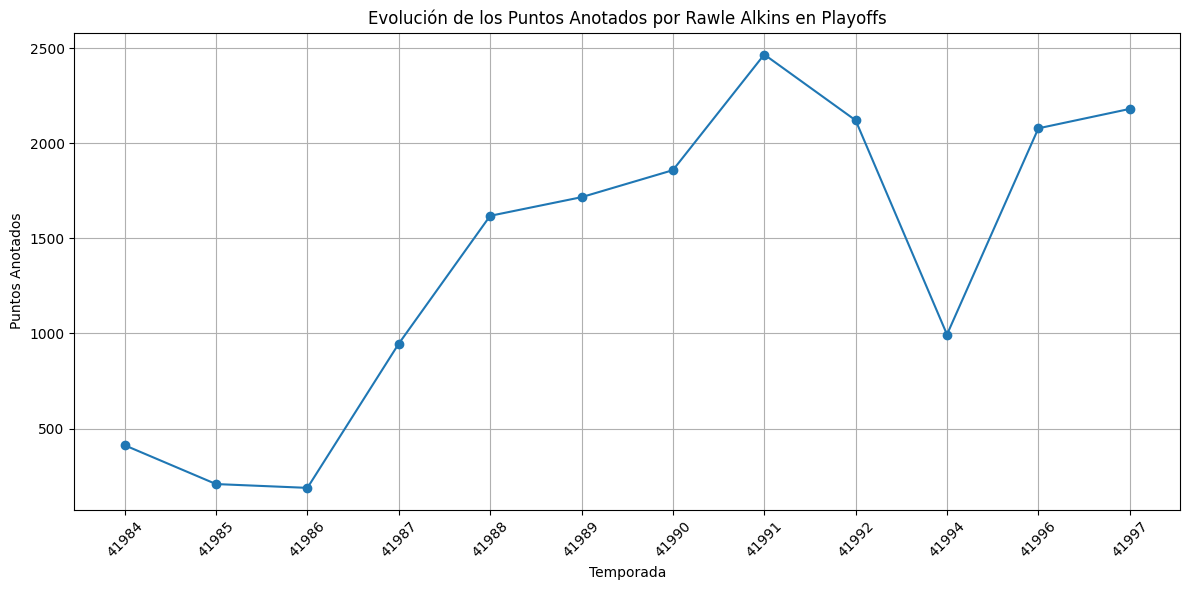

In [84]:
player_id_to_analyze = top_scorer_id

player_data = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze]
player_performance = player_data.groupby('season_id')['pts_home'].sum()

player_name = players_df[players_df['person_id'] == player_id_to_analyze]['display_first_last'].iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(player_performance.index, player_performance.values, marker='o', linestyle='-')
plt.xlabel("Temporada")
plt.ylabel("Puntos Anotados")
plt.title(f"Evolución de los Puntos Anotados por {player_name} en Playoffs")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

In [ ]:
# Agrupar por años de experiencia y calcular el promedio de puntos anotados

# Graficar la relación entre la experiencia y los puntos anotados



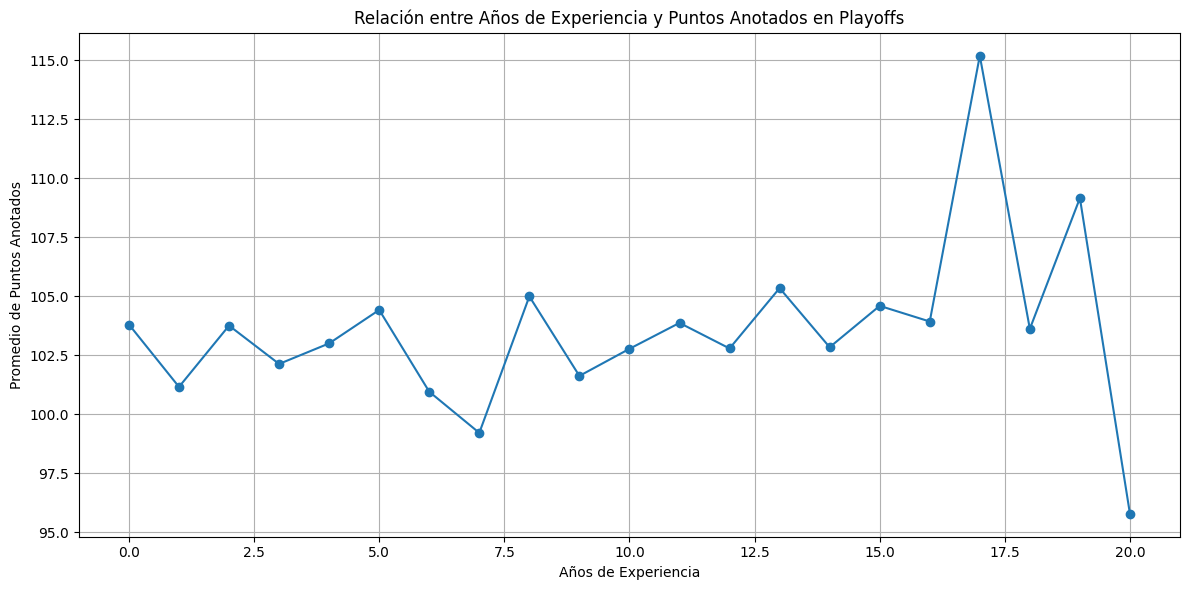

In [86]:
experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()
plt.figure(figsize=(12, 6))
plt.plot(experience_points.index, experience_points.values, marker='o', linestyle='-')
plt.xlabel("Años de Experiencia")
plt.ylabel("Promedio de Puntos Anotados")
plt.title("Relación entre Años de Experiencia y Puntos Anotados en Playoffs")
plt.grid(True)
plt.tight_layout()
plt.show()

No hay una relacion excata entre los los puntos y los años de experiencia

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

Las estrategias y tácticas del juego evolucionan constantemente, con la aparición de nuevas jugadas, sistemas defensivos y ofensivos más efectivos, y la adaptación a las fortalezas y debilidades de los rivales como elementos clave para el éxito a largo plazo. La calidad de los jugadores, reflejada en la incorporación de nuevos talentos, la mejora individual y la cohesión del equipo, es vital, destacando la importancia de jugadores con más experiencia y puntos por partido,la experiencia, aunque relacionada con el rendimiento, no es determinante.

2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

El impacto en los Playoffs puede inferirse al comparar su puntuación total y promedio de puntos por partido con otros jugadores, donde un alto puntaje sugiere un impacto considerable. Para mantener o mejorar su rendimiento, el entrenador debe realizar un análisis detallado del desempeño, considerando estadísticas como rebotes, asistencias, tiros, robos y pérdidas, y evaluar diferentes situaciones de juego. Además, es fundamental desarrollar estrategias personalizadas que aprovechen sus fortalezas y corrijan posibles inconsistencias, así como implementar un programa de entrenamiento físico y mental para optimizar su rendimiento bajo presión. Fomentar la cohesión del equipo es crucial para que el jugador cuente con el apoyo necesario y no asuma toda la carga, y su rendimiento debe evaluarse periódicamente para ajustar estrategias y roles según sea necesario. Por último, estudiar las debilidades de los rivales permitirá diseñar jugadas que le den una ventaja competitiva.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

cada rol es crucial para el rendimiento del equipo. Los bases destacan en la creación de juego y generación de puntos, mientras que las alas, gracias a su versatilidad, contribuyen tanto en la ofensiva como en la defensa. Aunque los pívots aportan menos en puntos, son esenciales en los rebotes y la defensa, asegurando segundas oportunidades y frenando al rival. El éxito en los playoffs depende de la cohesión del equipo, donde cada posición cumple un papel fundamental.